In [1]:
import pandas as pd
import sys
sys.path.append('../')
from helper.display_cluster import faceId_to_ogId
import matplotlib.pyplot as plt
import cv2
from helper.face_detector import draw_bounding_boxes, retinaface_detect_face
import pathlib

In [2]:
df_keep_1 = pd.read_csv("/media/bao/t7/la_lib_dataset/results/df/keep.csv")
df_keep_2 = pd.read_csv("/media/bao/t7/la_lib_dataset/results2/df/keep.csv")
df_keep = pd.concat([df_keep_1, df_keep_2])

In [3]:
df_keep["image_id"] = df_keep["image"].apply(faceId_to_ogId)

In [4]:
df_keep["image_id"].nunique()

27191

In [5]:
# group by image_id
df_imageId_count = df_keep.groupby("image_id").agg({"image": "count"}).reset_index()

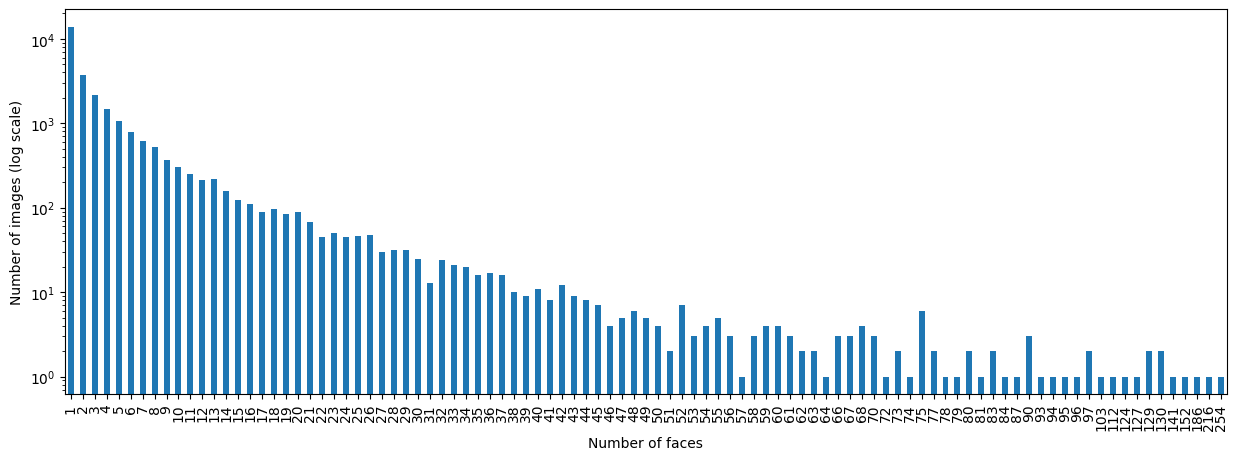

In [15]:
# index => the number of faces
# image => the number of images with that number of faces
fig, ax = plt.subplots(figsize=(15, 5))
df_imageId_count["image"].value_counts().reset_index().sort_values("index").plot.bar(x="index", y="image", ax=ax, logy=True)
ax.set_xlabel("Number of faces")
ax.set_ylabel("Number of images (log scale)")
# ax.legend(["Number of images"])
# remove legend
ax.get_legend().remove()

In [7]:
# show id of the two images with most faces
df_imageId_count.sort_values("image", ascending=False).head(4)

image_id  image
3338   1w40VJwGKGCA9u0R6w7ECY    254
19846  BdAtwbXXql4ApvFL6YZKSP    216
1626   0yCY5P80qvr8uaYrSvrFCz    186
15895  9HvWZjosK5P90qyy-K6daQ    152

In [8]:
img = cv2.imread("/media/bao/t7/la_lib_dataset/img/1w40VJwGKGCA9u0R6w7ECY.jpg")

In [2]:
def my_face_detect(img_name: str, threshold=0.95) -> dict:
    """
    Compare the face dectection on a given image: preview vs original quality
    """
    fig, ax = plt.subplots(figsize=(10, 10))

    img_original_path = pathlib.Path("/media/bao/t7/la_lib_dataset/img") / img_name

    img_original_bgr = cv2.imread(str(img_original_path))

    obj_original = retinaface_detect_face(img_original_bgr, align=False, threshold=threshold)

    img_original_h, img_original_w, _ = img_original_bgr.shape
    img_original_size = img_original_path.stat().st_size # in bytes
    title = f"{len(obj_original)} faces detected with {threshold=}"
    ax.set_title(title)
    draw_bounding_boxes(img_original_bgr, obj_original, ax=ax)

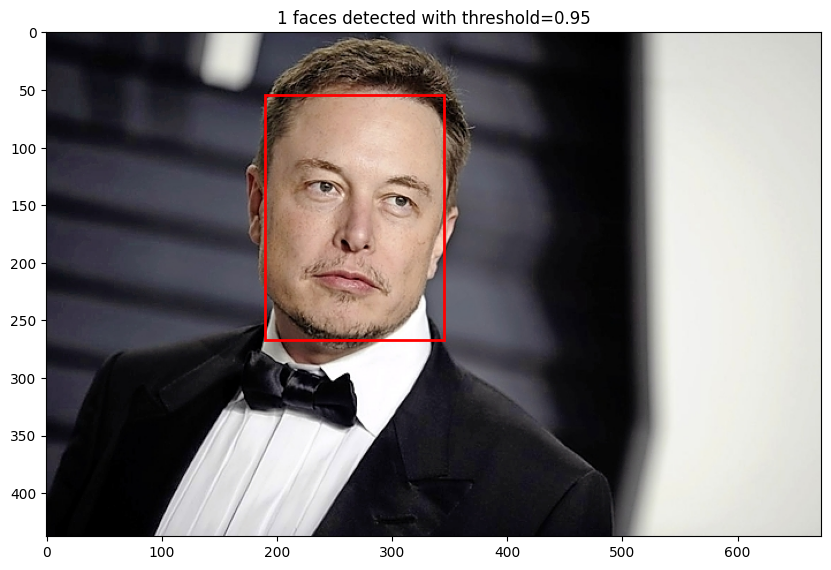

In [5]:
my_face_detect("5Eegciggq6vAXmszqJFueP.jpg")

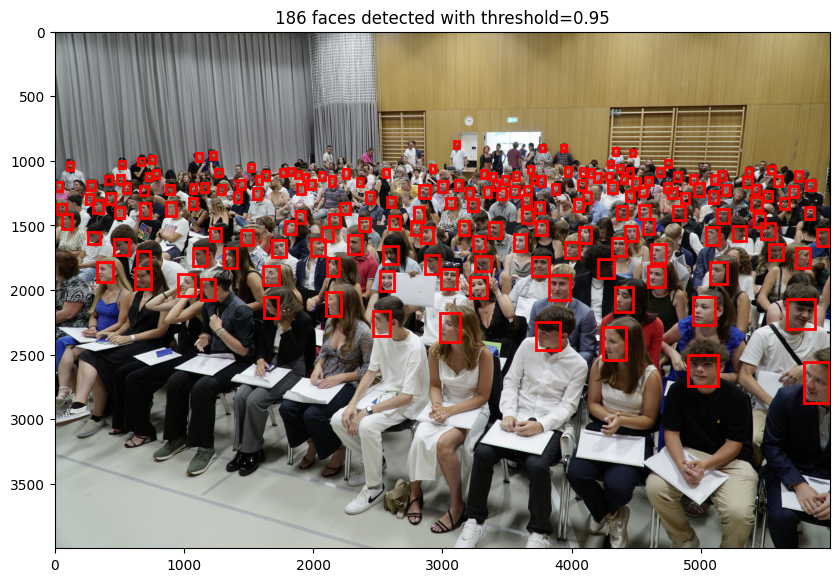

In [10]:
my_face_detect("0yCY5P80qvr8uaYrSvrFCz.jpg")

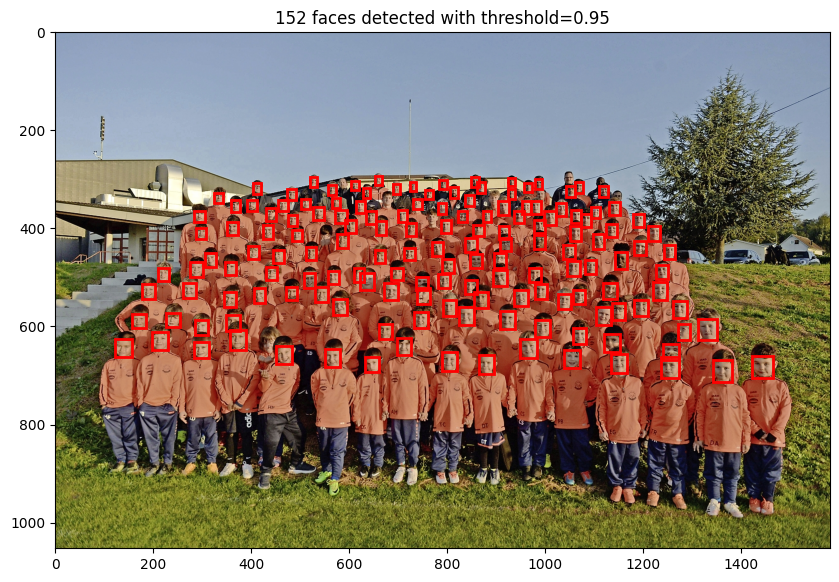

In [11]:
my_face_detect("9HvWZjosK5P90qyy-K6daQ.jpg")

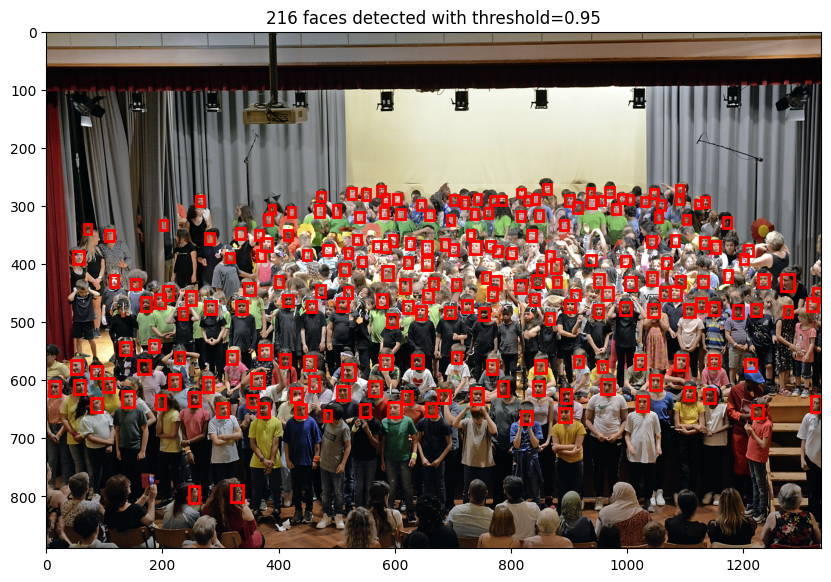

In [12]:
my_face_detect("BdAtwbXXql4ApvFL6YZKSP.jpg")

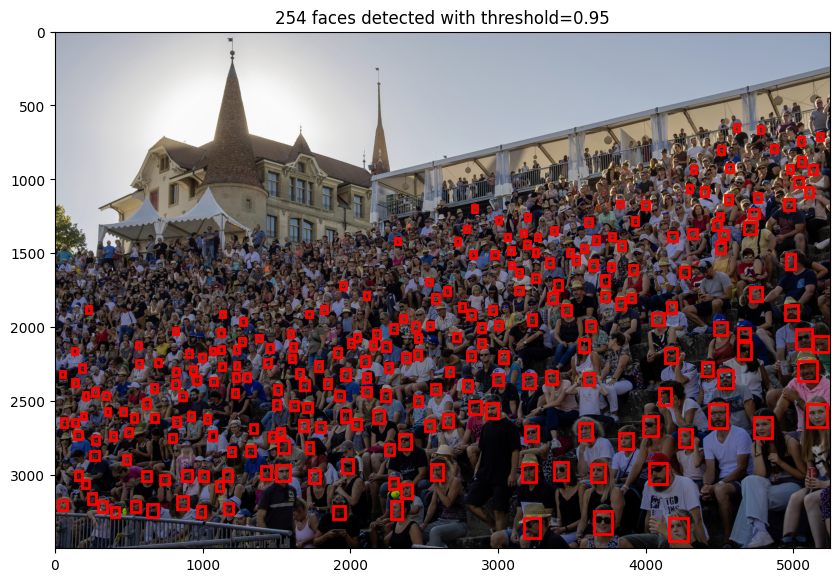

In [13]:
my_face_detect("1w40VJwGKGCA9u0R6w7ECY.jpg")